In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [5]:
df = df.iloc[:,1:]

In [6]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [7]:
df.shape

(100, 3)

In [15]:
# import matplotlib.pyplot as plt

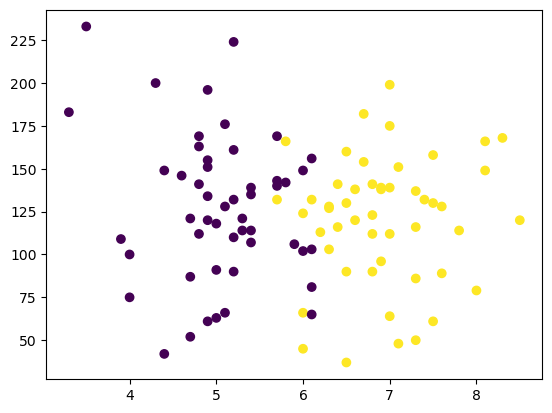

In [16]:
# plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [11]:
X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [12]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [13]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [22]:
y_test.shape

(10,)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

X_train

array([[ 1.38082958e+00,  6.62384422e-02],
       [ 1.12174412e+00, -2.38176526e-01],
       [-6.91854155e-01, -3.90384011e-01],
       [ 7.76296826e-01, -7.45534807e-01],
       [-5.19130510e-01,  3.45285497e-01],
       [-9.59575805e-04, -3.52332139e-02],
       [-1.12366327e+00, -1.11336956e-01],
       [ 1.12174412e+00,  2.94549669e-01],
       [-8.64577800e-01, -8.72374377e-01],
       [ 1.71764069e-01, -3.14280268e-01],
       [-6.91854155e-01,  9.03379606e-01],
       [ 6.03573181e-01,  7.25804207e-01],
       [ 4.30849536e-01, -8.97742291e-01],
       [-9.59575805e-04, -1.50657223e+00],
       [ 3.44487714e-01, -2.38176526e-01],
       [ 1.12174412e+00, -9.99213948e-01],
       [ 9.49020471e-01, -1.96319468e+00],
       [ 3.44487714e-01,  3.96021325e-01],
       [-2.16000514e+00,  2.72986942e+00],
       [-7.78215978e-01, -1.50657223e+00],
       [-8.64577800e-01, -1.58267597e+00],
       [-1.46911056e+00,  1.89272825e+00],
       [-2.60045043e-01,  1.10632292e+00],
       [-7.

In [26]:
X_test = scaler.transform(X_test)

X_test

array([[ 4.30849536e-01, -2.24224174e+00],
       [ 6.89935004e-01, -8.97742291e-01],
       [ 9.49020471e-01,  6.49700465e-01],
       [ 2.58125891e-01,  6.62384422e-02],
       [-2.60045043e-01,  1.67710098e-01],
       [-9.59575805e-04,  5.98964637e-01],
       [-1.12366327e+00, -1.86172303e+00],
       [-1.72819602e+00, -1.27826100e+00],
       [-6.05492333e-01, -1.11336956e-01],
       [ 5.17211359e-01,  3.19917583e-01]])

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [28]:
lr.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [31]:
y_test

82    1
35    1
21    1
63    1
87    1
33    0
94    0
68    0
2     0
48    1
Name: placement, dtype: int64

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9

<Axes: >

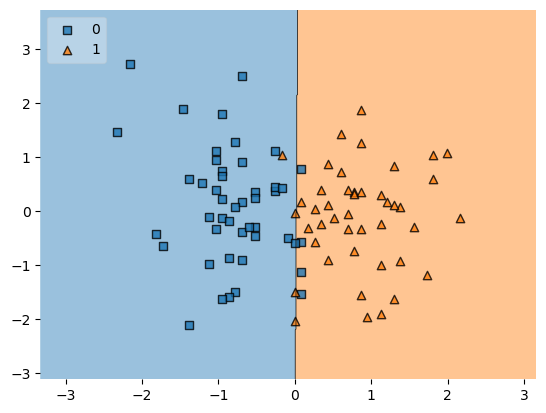

In [34]:
# from mlxtend.plotting import plot_decision_regions
# 
# plot_decision_regions(X_train,y_train.values,clf=lr,legend=2)

In [35]:
import pickle
pickle.dump(lr,open("model.pkl",'wb'))